In [1]:
import numpy as np
from scipy.constants import mu_0
from matplotlib import pyplot as plt
from forschungspraktikum.jiles_atherton import JilesAthertonH

# Explizites Eulerverfahren

Das explizite Eulerverfahren ist der einfachste Ansatz, um ODEs numerisch zu integrieren. Betrachtet man eine ODE der Form

\begin{equation}
    \frac{dy}{dt} = f(y, t),
\end{equation}

so ergibt sich das explizite Eulerverfahren durch die Überführung des Differentialquotientens in den Differenzenquotienten:

\begin{align}
    \frac{dy}{dt} = f(y, t) \quad\rightarrow\quad  \frac{y_n - y_{n-1}}{t_n - t_{n-1}} = f(y_{n-1}, t_{n-1}) \\[0.5cm]
    \Rightarrow \quad  y_n = y_{n-1} + f(y_{n-1}, t_{n-1})(t_n - t_{n-1})
\end{align}

Da die Funktion $f$ beim bereits bekannten Punkt $(y_{n-1}, t_{n-1})$ ausgewertet wird, ist dieses Verfahren ein explizites Verfahren. Ein alternativer Ansatz wäre das implizite Eulerverfahren, bei dem die Funktion an der Stelle $(y_n, t_n)$ ausgewertet wird. Dadurch wird die Gleichung für den neuen Wert $y_n$ implizit und ist somit deutlich aufwändiger zu lösen.

## Explizites Eulerverfahren beim Jiles-Atherton-Modell
Das Jiles-Atherton-Modell gibt das Differential der Magnetisierung $M$ nach der magnetischen Feldstärke $H$ an, $dM/dH$. Gibt man nun ein Feld $H(t)$ in einem Ringkern vor, das beispielsweise von einem Strom $i(t)$ hervorgerufen wird, so gilt:

\begin{align}
    H(t) = \frac{i(t)}{2\pi r},
\end{align}
wobei ein Ort betrachtet wird, der sich im Abstand $r$ vom Mittelpunkt befindet, an dem sich der Leiter befindet. Die Anwendung des expliziten Eulerverfahrens ergibt:

\begin{align}
    \frac{dM}{dH} &= f_{JA}(M, H, dH/dt)\\[0.3cm]
    \Rightarrow \frac{dM}{dt} &= f_{JA}(M, H, dH/dt)\frac{dH}{dt} \\[0.3cm]
    \Rightarrow M_n &= M_{n-1} + f_{JA}\left(M_{n-1}, H_{n-1}, (dH/dt)_{n-1}\right) \left(\frac{dH}{dt}\right)_{n-1}(t_n - t_{n-1}),
\end{align}

dabei ist entsprechend
\begin{equation}
    \left(\frac{dH}{dt}\right)_{n-1} = \frac{H_{n-1} - H_{n-2}}{t_{n-1} - t_{n-2}}
\end{equation}

In [2]:
r = 2.0e-2 # m, Radius
i_hat = 20.0 # A, Strom
f = 1.0e3 # Hz, Frequenz
n = 20 # Anzahl Perioden
n_p = 360 # Datenpunkte pro Periode

t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.sin(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.0021
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

# Parametervektor
p = {'alpha': alpha,
     'a': a,
     'k': k,
     'c': c,
     'm_sat': Msat}

In [3]:
# Initialisierung von M
M = np.zeros(np.size(t))

# Explizites Eulerverfahren
for i in range(1, np.size(t)):
    dH_dt = (H[i-1]-H[i-2])/(t[i-1] - t[i-2])
    M[i] = M[i-1] + JilesAthertonH(M[i-1], H[i-1], dH_dt, p) * dH_dt * (t[n] - t[n-1])    

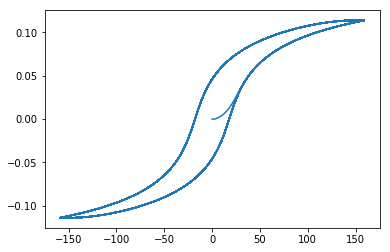

In [4]:
B = mu_0*(H + M)
plt.plot(H, B)

Man erhält also mit diesem sehr einfachen Ansatz schon vielversprechende Ergebnisse. Jedoch kann man die Ungenauigkeiten des doch sehr simplen Algorithmus schnell sehen, wenn man sich beispielsweise kleinen Amplituden zuwendet:

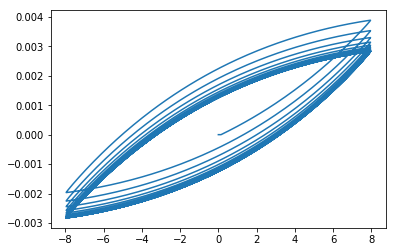

In [5]:
i_hat = 1 # A, Strom
current = i_hat*np.sin(2*np.pi*f*t) # Stromvorgabe
H2 = current/(2*np.pi*r) # Resultierende Feldvorgabe
# Initialisierung von M
M2 = np.zeros(np.size(t))

# Explizites Eulerverfahren
for i in range(1, np.size(t)):
    dH_dt = (H2[i-1]-H2[i-2])/(t[i-1] - t[i-2])
    M2[i] = M2[i-1] + JilesAthertonH(M2[i-1], H2[i-1], dH_dt, p) * dH_dt * (t[n] - t[n-1])
    
B2 = mu_0*(H2 + M2)
plt.plot(H2, B2)

Eventuell ist die Form dieses Graphen aber auch auf den Einschwingvorgang des Kerns zurückzuführen.

In jedem Fall lohnt es sich, einen besseren Integrationsalgorithmus zu verwenden, der eine höhere Genauigkeit bzw. weniger Rechenaufwand verspricht, den [RK4-Algorithmus](runge-kutta.ipynb). Kurze Beispiele zu den Nachteilen des eulerschen Verfahrens finden sich in [euler-integration](../scripts/euler-integration.ipynb)